<a href="https://colab.research.google.com/github/silalatuconsina/HotelQu/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Skripsi/dataset/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


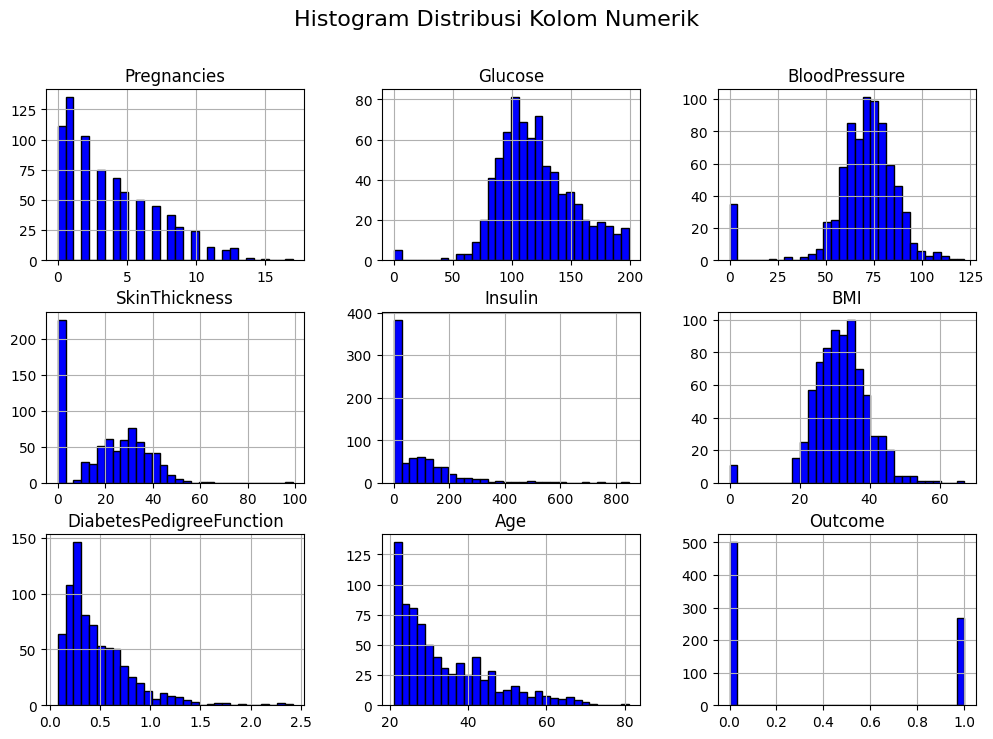

In [ ]:
# Pilih hanya kolom numerik
numerik_cols = dataset.select_dtypes(include=["number"]).columns.tolist()

# Buat histogram untuk setiap kolom numerik
dataset[numerik_cols].hist(figsize=(12, 8), bins=30, color="blue", edgecolor="black")
plt.suptitle("Histogram Distribusi Kolom Numerik", fontsize=16)
plt.show()


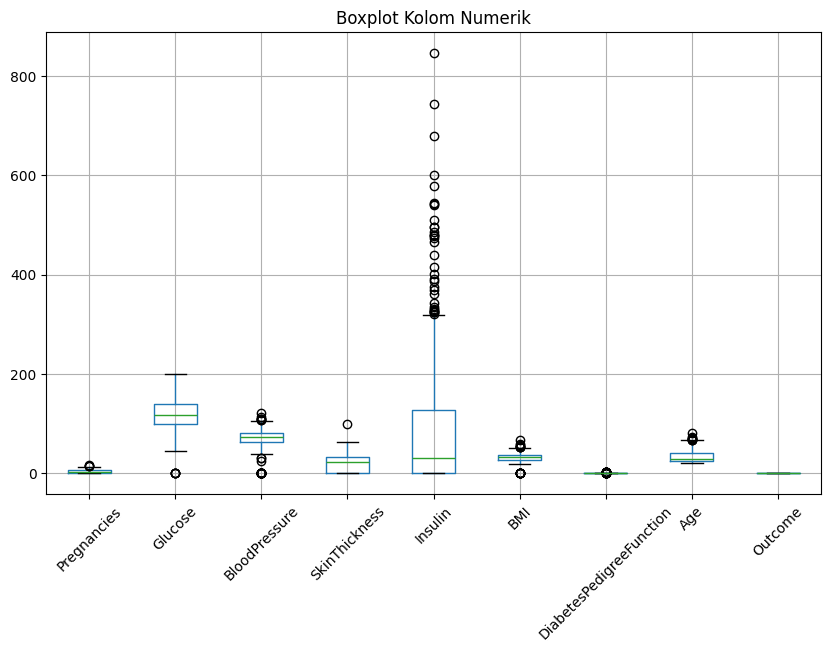

In [ ]:
numerik_cols = dataset.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 6))
dataset[numerik_cols].boxplot(rot=45)
plt.title("Boxplot Kolom Numerik")
plt.show()

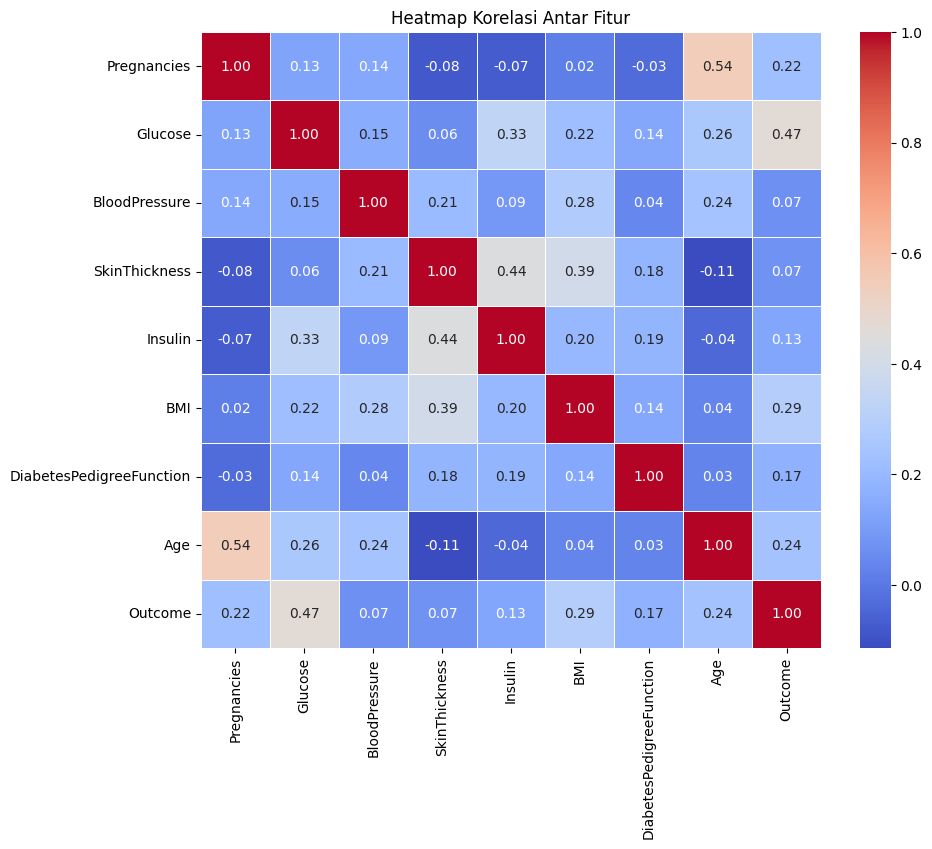

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = dataset.corr()

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

# Pre-processing

## Handling Missing Values

In [ ]:
dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Handling Duplicated

In [ ]:
dataset.duplicated().sum()

0

## Handling Outlier

In [ ]:
dataset["Insulin"] = np.log1p(dataset["Insulin"])

## Normalisasi Data

In [ ]:
X = dataset.drop(columns="Outcome")
y = dataset["Outcome"]

In [ ]:
# Misalkan X adalah DataFrame asli
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Konversi kembali ke DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # Tetap gunakan nama kolom asli

## Balancing Data

<ipython-input-14-3a4c85e90c87>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='Outcome', palette='rocket')


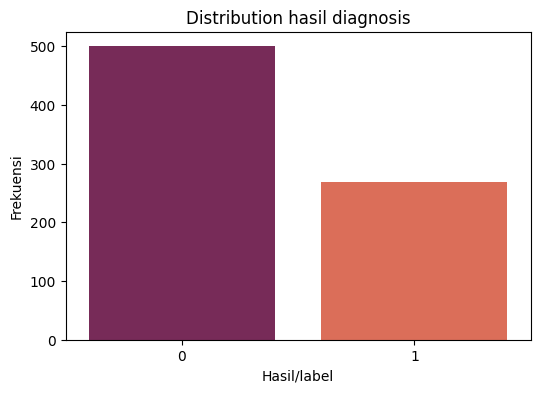

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='Outcome', palette='rocket')

plt.title('Distribution hasil diagnosis')
plt.xlabel('Hasil/label')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
# Menyeimbangkan data jika kelas tidak seimbang
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

<ipython-input-16-7d55d53d4d4d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x=y_resampled, palette='rocket')


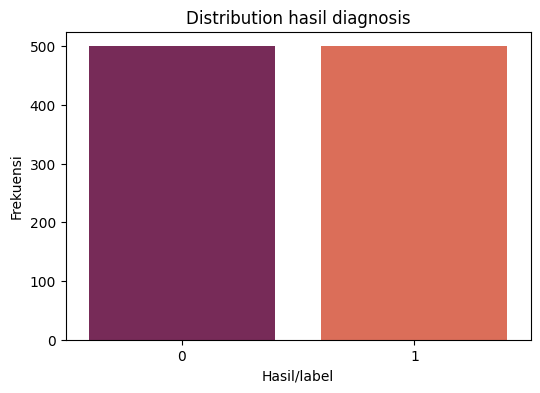

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x=y_resampled, palette='rocket')

plt.title('Distribution hasil diagnosis')
plt.xlabel('Hasil/label')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
X_resampled.shape, y_resampled.shape

((1000, 8), (1000,))

# Modelling

## Splitting Data

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((800, 8), (800,))

In [ ]:
# Convert to numpy arrays to avoid index issues
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.values if isinstance(X_test, pd.DataFrame) else X_test
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train
y_test = y_test.values if isinstance(y_test, pd.Series) else y_test

In [ ]:
# Hyperparameter Tuning
kfold = KFold(n_splits=20, shuffle=True, random_state=42)

## Logistic Regression

In [ ]:
# Define the Logistic Regression model with default parameters
logreg = LogisticRegression(random_state=42)

# Store results
accuracies = []
auc_scores = []

# Train the model with KFold cross-validation
for k, (train_idx, val_idx) in enumerate(kfold.split(X_train), 1):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    logreg.fit(X_train_fold, y_train_fold)
    y_val_pred = logreg.predict(X_val_fold)
    y_val_prob = logreg.predict_proba(X_val_fold)[:, 1]  # Probabilities for AUC calculation

    # Calculate accuracy for this fold
    val_accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracies.append(val_accuracy)

    # Calculate AUC for this fold
    auc = roc_auc_score(y_val_fold, y_val_prob)
    auc_scores.append(auc)

    # Print accuracy for this fold
    print(f"Accuracy for Fold {k}: {val_accuracy:.4f}")

# Calculate mean, min, and max for accuracies and AUC scores
mean_accuracy = np.mean(accuracies)
min_accuracy = np.min(accuracies)
max_accuracy = np.max(accuracies)

mean_auc = np.mean(auc_scores)
min_auc = np.min(auc_scores)
max_auc = np.max(auc_scores)

print(f"\nCross-Validation Results:")
print(f"Average Accuracy: {mean_accuracy:.4f}")
print(f"Min Accuracy: {min_accuracy:.4f}")
print(f"Max Accuracy: {max_accuracy:.4f}")
print(f"Average AUC: {mean_auc:.4f}")
print(f"Min AUC: {min_auc:.4f}")
print(f"Max AUC: {max_auc:.4f}\n")

# Train the final model on the entire training set
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilities for AUC calculation

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
test_conf_matrix_lr = confusion_matrix(y_test, y_pred)
test_auc = roc_auc_score(y_test, y_prob)

# Print classification report
print(f"Test Classification Report:\n{classification_report(y_test, y_pred)}")

# Print additional test results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Accuracy for Fold 1: 0.7250
Accuracy for Fold 2: 0.7500
Accuracy for Fold 3: 0.8500
Accuracy for Fold 4: 0.7750
Accuracy for Fold 5: 0.7500
Accuracy for Fold 6: 0.6750
Accuracy for Fold 7: 0.6500
Accuracy for Fold 8: 0.7750
Accuracy for Fold 9: 0.7000
Accuracy for Fold 10: 0.6250
Accuracy for Fold 11: 0.8000
Accuracy for Fold 12: 0.8000
Accuracy for Fold 13: 0.7000
Accuracy for Fold 14: 0.6500
Accuracy for Fold 15: 0.8750
Accuracy for Fold 16: 0.8750
Accuracy for Fold 17: 0.7000
Accuracy for Fold 18: 0.7500
Accuracy for Fold 19: 0.9000
Accuracy for Fold 20: 0.7750

Cross-Validation Results:
Average Accuracy: 0.7550
Min Accuracy: 0.6250
Max Accuracy: 0.9000
Average AUC: 0.8414
Min AUC: 0.7343
Max AUC: 0.9470

Test Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76        99
           1       0.76      0.79      0.78       101

    accuracy                           0.77       200
   macro avg       0.77      0.77   

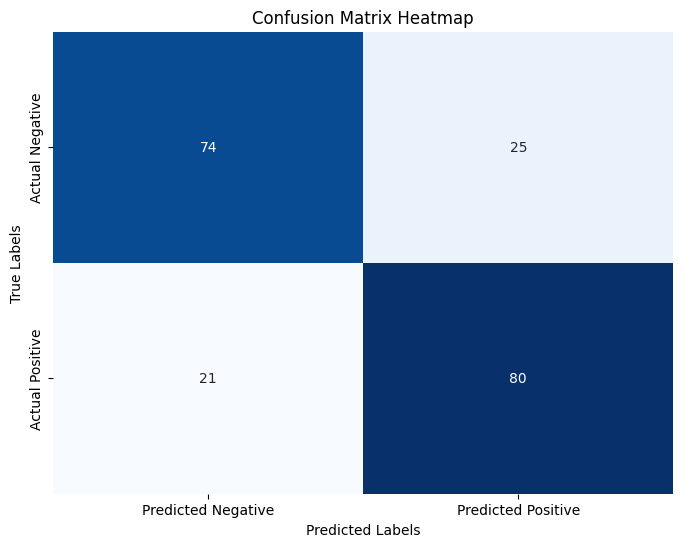

In [ ]:
# Buat figure untuk menampilkan heatmap
plt.figure(figsize=(8, 6))

# Visualisasikan confusion matrix dengan heatmap
sns.heatmap(test_conf_matrix_lr, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

# Memberikan label dan judul
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Tampilkan plot
plt.show()

## Random Forest

In [ ]:
# Define the Random Forest model with default parameters
rf = RandomForestClassifier(random_state=42)

# Store results
accuracies = []
auc_scores = []

# Train the model with KFold cross-validation
for k, (train_idx, val_idx) in enumerate(kfold.split(X_train), 1):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    rf.fit(X_train_fold, y_train_fold)
    y_val_pred = rf.predict(X_val_fold)
    y_val_prob = rf.predict_proba(X_val_fold)[:, 1]  # Probabilities for AUC calculation

    # Calculate accuracy for this fold
    val_accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracies.append(val_accuracy)

    # Calculate AUC for this fold
    auc = roc_auc_score(y_val_fold, y_val_prob)
    auc_scores.append(auc)

    # Print accuracy for this fold
    print(f"Accuracy for Fold {k}: {val_accuracy:.4f}")

# Calculate mean, min, and max for accuracies and AUC scores
mean_accuracy = np.mean(accuracies)
min_accuracy = np.min(accuracies)
max_accuracy = np.max(accuracies)

mean_auc = np.mean(auc_scores)
min_auc = np.min(auc_scores)
max_auc = np.max(auc_scores)

print(f"\nCross-Validation Results:")
print(f"Average Accuracy: {mean_accuracy:.4f}")
print(f"Min Accuracy: {min_accuracy:.4f}")
print(f"Max Accuracy: {max_accuracy:.4f}")
print(f"Average AUC: {mean_auc:.4f}")
print(f"Min AUC: {min_auc:.4f}")
print(f"Max AUC: {max_auc:.4f}\n")

# Train the final model on the entire training set
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for AUC calculation

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
test_conf_matrix_rf = confusion_matrix(y_test, y_pred)
test_auc = roc_auc_score(y_test, y_prob)

# Print classification report
print(f"Test Classification Report:\n{classification_report(y_test, y_pred)}")

# Print additional test results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")


Accuracy for Fold 1: 0.8250
Accuracy for Fold 2: 0.8250
Accuracy for Fold 3: 0.8500
Accuracy for Fold 4: 0.8500
Accuracy for Fold 5: 0.8000
Accuracy for Fold 6: 0.8000
Accuracy for Fold 7: 0.8000
Accuracy for Fold 8: 0.9000
Accuracy for Fold 9: 0.8000
Accuracy for Fold 10: 0.8000
Accuracy for Fold 11: 0.8750
Accuracy for Fold 12: 0.8500
Accuracy for Fold 13: 0.7500
Accuracy for Fold 14: 0.7500
Accuracy for Fold 15: 0.8500
Accuracy for Fold 16: 0.8500
Accuracy for Fold 17: 0.7750
Accuracy for Fold 18: 0.8000
Accuracy for Fold 19: 0.9500
Accuracy for Fold 20: 0.7750

Cross-Validation Results:
Average Accuracy: 0.8238
Min Accuracy: 0.7500
Max Accuracy: 0.9500
Average AUC: 0.9098
Min AUC: 0.8649
Max AUC: 0.9949

Test Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        99
           1       0.80      0.89      0.85       101

    accuracy                           0.83       200
   macro avg       0.84      0.83   

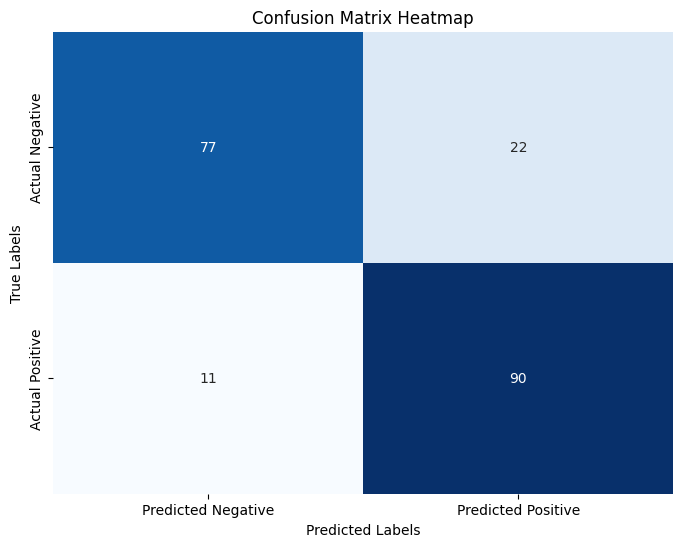

In [ ]:
# Buat figure untuk menampilkan heatmap
plt.figure(figsize=(8, 6))

# Visualisasikan confusion matrix dengan heatmap
sns.heatmap(test_conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

# Memberikan label dan judul
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Tampilkan plot
plt.show()

## Support Vector Machine

In [ ]:
# Define the SVM model with default parameters
svm = SVC(random_state=42, probability=True)

# Store results
accuracies = []
auc_scores = []

# Train the model with KFold cross-validation
for k, (train_idx, val_idx) in enumerate(kfold.split(X_train), 1):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    svm.fit(X_train_fold, y_train_fold)
    y_val_pred = svm.predict(X_val_fold)
    y_val_prob = svm.predict_proba(X_val_fold)[:, 1]  # Probabilities for AUC calculation

    # Calculate accuracy for this fold
    val_accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracies.append(val_accuracy)

    # Calculate AUC for this fold
    auc = roc_auc_score(y_val_fold, y_val_prob)
    auc_scores.append(auc)

    # Print accuracy for this fold
    print(f"Accuracy for Fold {k}: {val_accuracy:.4f}")

# Calculate mean, min, and max for accuracies and AUC scores
mean_accuracy = np.mean(accuracies)
min_accuracy = np.min(accuracies)
max_accuracy = np.max(accuracies)

mean_auc = np.mean(auc_scores)
min_auc = np.min(auc_scores)
max_auc = np.max(auc_scores)

print(f"\nCross-Validation Results:")
print(f"Average Accuracy: {mean_accuracy:.4f}")
print(f"Min Accuracy: {min_accuracy:.4f}")
print(f"Max Accuracy: {max_accuracy:.4f}")
print(f"Average AUC: {mean_auc:.4f}")
print(f"Min AUC: {min_auc:.4f}")
print(f"Max AUC: {max_auc:.4f}\n")

# Train the final model on the entire training set
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:, 1]  # Probabilities for AUC calculation

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
test_conf_matrix_svm = confusion_matrix(y_test, y_pred)
test_auc = roc_auc_score(y_test, y_prob)

# Print classification report
print(f"Test Classification Report:\n{classification_report(y_test, y_pred)}")

# Print additional test results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Accuracy for Fold 1: 0.8500
Accuracy for Fold 2: 0.8250
Accuracy for Fold 3: 0.8750
Accuracy for Fold 4: 0.7750
Accuracy for Fold 5: 0.8000
Accuracy for Fold 6: 0.7500
Accuracy for Fold 7: 0.7750
Accuracy for Fold 8: 0.8250
Accuracy for Fold 9: 0.6750
Accuracy for Fold 10: 0.7750
Accuracy for Fold 11: 0.7500
Accuracy for Fold 12: 0.8250
Accuracy for Fold 13: 0.7750
Accuracy for Fold 14: 0.6750
Accuracy for Fold 15: 0.8750
Accuracy for Fold 16: 0.8250
Accuracy for Fold 17: 0.7250
Accuracy for Fold 18: 0.7500
Accuracy for Fold 19: 0.9250
Accuracy for Fold 20: 0.8250

Cross-Validation Results:
Average Accuracy: 0.7937
Min Accuracy: 0.6750
Max Accuracy: 0.9250
Average AUC: 0.8671
Min AUC: 0.7626
Max AUC: 0.9798

Test Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.70      0.75        99
           1       0.74      0.85      0.79       101

    accuracy                           0.78       200
   macro avg       0.78      0.77   

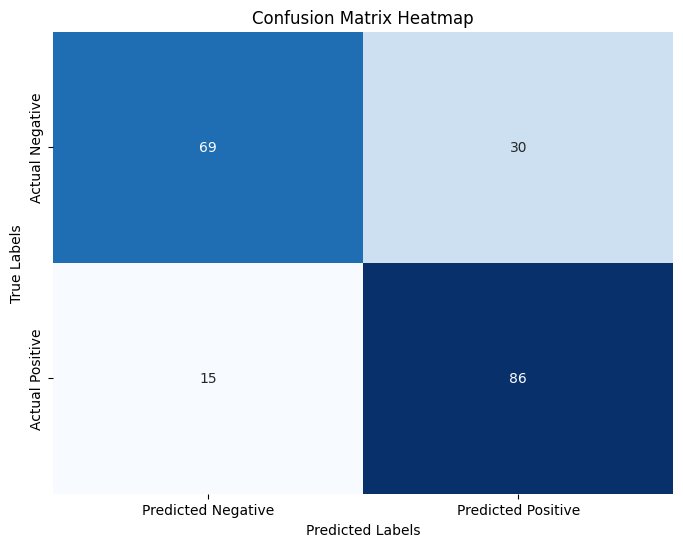

In [ ]:
# Buat figure untuk menampilkan heatmap
plt.figure(figsize=(8, 6))

# Visualisasikan confusion matrix dengan heatmap
sns.heatmap(test_conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

# Memberikan label dan judul
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Tampilkan plot
plt.show()

## KNN

In [ ]:
# Define the KNN model with default parameters
knn = KNeighborsClassifier()

# Store results
accuracies = []
auc_scores = []

# Train the model with KFold cross-validation
for k, (train_idx, val_idx) in enumerate(kfold.split(X_train), 1):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    knn.fit(X_train_fold, y_train_fold)
    y_val_pred = knn.predict(X_val_fold)
    y_val_prob = knn.predict_proba(X_val_fold)[:, 1]  # Probabilities for AUC calculation

    # Calculate accuracy for this fold
    val_accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracies.append(val_accuracy)

    # Calculate AUC for this fold
    auc = roc_auc_score(y_val_fold, y_val_prob)
    auc_scores.append(auc)

    # Print accuracy for this fold
    print(f"Accuracy for Fold {k}: {val_accuracy:.4f}")

# Calculate mean, min, and max for accuracies and AUC scores
mean_accuracy = np.mean(accuracies)
min_accuracy = np.min(accuracies)
max_accuracy = np.max(accuracies)

mean_auc = np.mean(auc_scores)
min_auc = np.min(auc_scores)
max_auc = np.max(auc_scores)

print(f"\nCross-Validation Results:")
print(f"Average Accuracy: {mean_accuracy:.4f}")
print(f"Min Accuracy: {min_accuracy:.4f}")
print(f"Max Accuracy: {max_accuracy:.4f}")
print(f"Average AUC: {mean_auc:.4f}")
print(f"Min AUC: {min_auc:.4f}")
print(f"Max AUC: {max_auc:.4f}\n")

# Train the final model on the entire training set
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilities for AUC calculation

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
test_conf_matrix_knn = confusion_matrix(y_test, y_pred)
test_auc = roc_auc_score(y_test, y_prob)

# Print classification report
print(f"Test Classification Report:\n{classification_report(y_test, y_pred)}")

# Print additional test results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")


Accuracy for Fold 1: 0.7500
Accuracy for Fold 2: 0.8250
Accuracy for Fold 3: 0.8750
Accuracy for Fold 4: 0.7500
Accuracy for Fold 5: 0.7750
Accuracy for Fold 6: 0.7000
Accuracy for Fold 7: 0.7750
Accuracy for Fold 8: 0.9000
Accuracy for Fold 9: 0.6750
Accuracy for Fold 10: 0.7000
Accuracy for Fold 11: 0.6500
Accuracy for Fold 12: 0.8250
Accuracy for Fold 13: 0.6750
Accuracy for Fold 14: 0.7250
Accuracy for Fold 15: 0.7750
Accuracy for Fold 16: 0.7250
Accuracy for Fold 17: 0.6750
Accuracy for Fold 18: 0.8250
Accuracy for Fold 19: 0.9500
Accuracy for Fold 20: 0.8250

Cross-Validation Results:
Average Accuracy: 0.7687
Min Accuracy: 0.6500
Max Accuracy: 0.9500
Average AUC: 0.8552
Min AUC: 0.7619
Max AUC: 0.9924

Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        99
           1       0.74      0.86      0.79       101

    accuracy                           0.78       200
   macro avg       0.78      0.77   

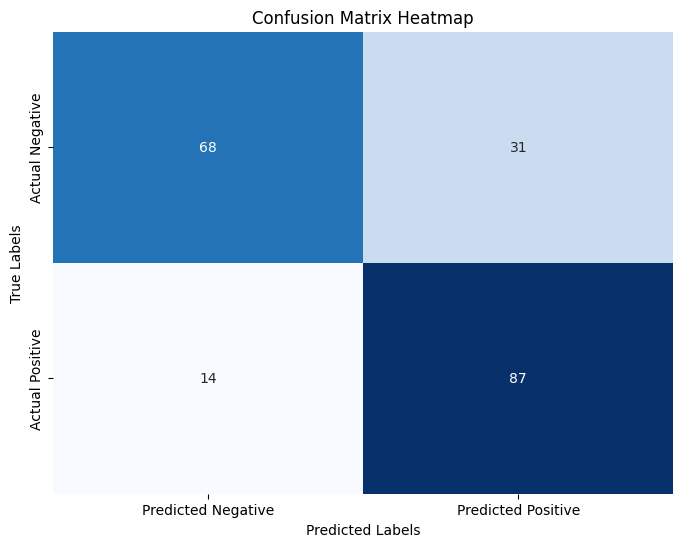

In [ ]:
# Buat figure untuk menampilkan heatmap
plt.figure(figsize=(8, 6))

# Visualisasikan confusion matrix dengan heatmap
sns.heatmap(test_conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

# Memberikan label dan judul
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')

# Tampilkan plot
plt.show()

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

# Define base models for stacking
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC(probability=True, random_state=42))
]

# Define meta-model
meta_model = LogisticRegression()

# Create the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# KFold cross-validation setup
kfold = KFold(n_splits=20, shuffle=True, random_state=42)

# Store results for accuracies and AUC scores
accuracies = []
auc_scores = []

# Train and evaluate the model using KFold cross-validation
for k, (train_idx, val_idx) in enumerate(kfold.split(X_train), 1):
    # Use numpy array indexing instead of .iloc
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Train the stacking model on the training fold
    stacking_model.fit(X_train_fold, y_train_fold)

    # Make predictions on the validation fold
    y_val_pred = stacking_model.predict(X_val_fold)
    y_val_prob = stacking_model.predict_proba(X_val_fold)[:, 1]  # Probabilities for AUC calculation

    # Calculate accuracy and AUC for this fold
    val_accuracy = accuracy_score(y_val_fold, y_val_pred)
    accuracies.append(val_accuracy)

    val_auc = roc_auc_score(y_val_fold, y_val_prob)
    auc_scores.append(val_auc)

    # Print accuracy for this fold
    print(f"Accuracy for Fold {k}: {val_accuracy:.4f}")


# Calculate mean, min, and max for accuracies and AUC scores
mean_accuracy = np.mean(accuracies)
min_accuracy = np.min(accuracies)
max_accuracy = np.max(accuracies)

mean_auc = np.mean(auc_scores)
min_auc = np.min(auc_scores)
max_auc = np.max(auc_scores)

print(f"\nCross-Validation Results:")
print(f"Average Accuracy: {mean_accuracy:.4f}")
print(f"Min Accuracy: {min_accuracy:.4f}")
print(f"Max Accuracy: {max_accuracy:.4f}")
print(f"Average AUC: {mean_auc:.4f}")
print(f"Min AUC: {min_auc:.4f}")
print(f"Max AUC: {max_auc:.4f}\n")

# Train the final stacking model on the entire training set
stacking_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = stacking_model.predict(X_test)
y_test_prob = stacking_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC calculation

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_prob)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print classification report
print(f"Test Classification Report:\n{classification_report(y_test, y_test_pred)}")

# Print additional test results
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Visualize confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns



Accuracy for Fold 1: 0.8250
Accuracy for Fold 2: 0.8500
Accuracy for Fold 3: 0.9000
Accuracy for Fold 4: 0.8250
Accuracy for Fold 5: 0.8250
Accuracy for Fold 6: 0.8000
Accuracy for Fold 7: 0.8000
Accuracy for Fold 8: 0.9000
Accuracy for Fold 9: 0.8250
Accuracy for Fold 10: 0.8000
Accuracy for Fold 11: 0.8750
Accuracy for Fold 12: 0.8750
Accuracy for Fold 13: 0.7250
Accuracy for Fold 14: 0.7000
Accuracy for Fold 15: 0.8750
Accuracy for Fold 16: 0.8750
Accuracy for Fold 17: 0.7250
Accuracy for Fold 18: 0.8000
Accuracy for Fold 19: 0.9500
Accuracy for Fold 20: 0.7750

Cross-Validation Results:
Average Accuracy: 0.8262
Min Accuracy: 0.7000
Max Accuracy: 0.9500
Average AUC: 0.9043
Min AUC: 0.8409
Max AUC: 1.0000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        99
           1       0.79      0.89      0.84       101

    accuracy                           0.82       200
   macro avg       0.83      0.82   

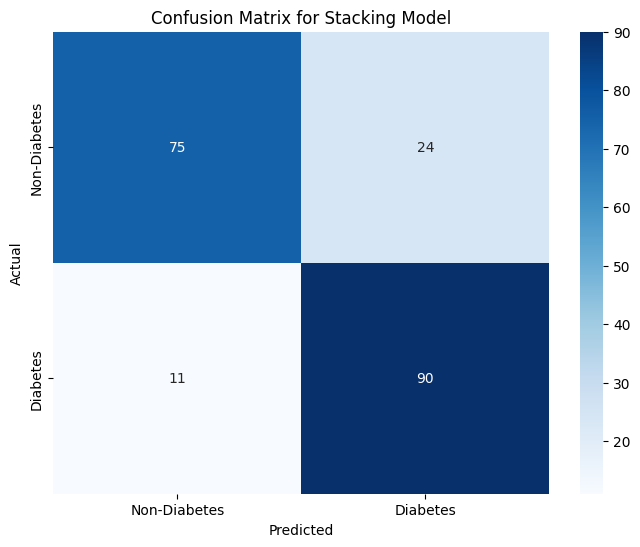

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Diabetes", "Diabetes"], yticklabels=["Non-Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Stacking Model")
plt.show()

# Evaluasi

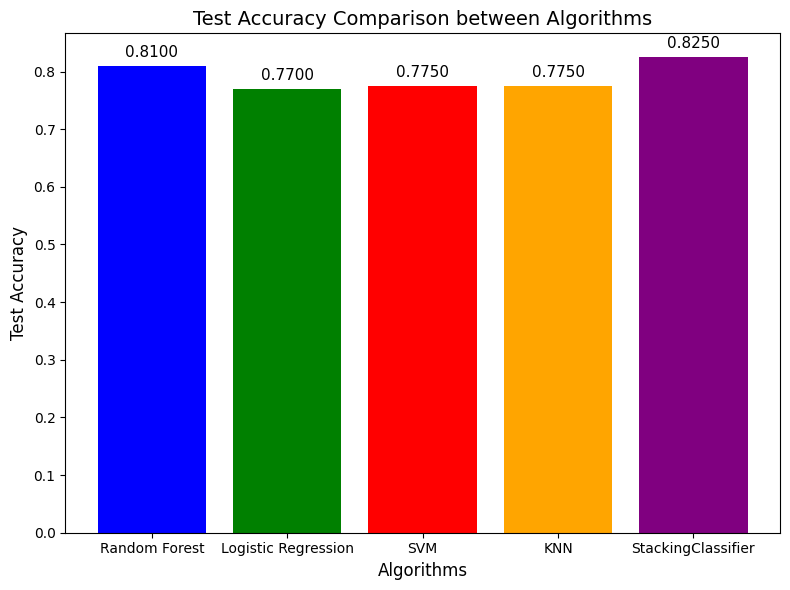

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Define base models for stacking
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('svc', SVC(probability=True, random_state=42))
]

# Define meta-model for stacking
meta_model = LogisticRegression()

# Define models to evaluate
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'StackingClassifier': StackingClassifier(estimators=base_learners, final_estimator=meta_model)
}

# Store the test accuracies
test_accuracies = []

# Train each model and calculate test accuracy
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    test_accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    test_accuracies.append(test_accuracy)  # Store accuracy

# Bar chart visualization
x_pos = np.arange(len(models))  # Position for each bar

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(x_pos, test_accuracies, color=['blue', 'green', 'red', 'orange', 'purple'])

# Add labels and title
plt.xlabel('Algorithms', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Test Accuracy Comparison between Algorithms', fontsize=14)

# Add accuracy values on top of the bars
for i, v in enumerate(test_accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontsize=11)

# Add algorithm names on the x-axis
plt.xticks(x_pos, models.keys())

# Show plot
plt.tight_layout()
plt.show()